<!--lint disable no-heading-punctuation-->
# Surfs Up!
<!--lint enable no-heading-punctuation-->

<img src='images/surfs-up.jpeg' />

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you decided to do some climate analysis on the area. Because you are such an awesome person, you have decided to share your ninja analytical skills with the community by providing a climate analysis api. The following outlines what you need to do.

## Step 1 - Data Engineering

The climate data for Hawaii is provided through two CSV files. Start by using Python and Pandas to inspect the content of these files and clean the data.

* Create a Jupyter Notebook file called `data_engineering.ipynb` and use this to complete all of your Data Engineering tasks.

* Use Pandas to read in the measurement and station CSV files as DataFrames.

* Inspect the data for NaNs and missing values. You must decide what to do with this data.

* Save your cleaned CSV files with the prefix `clean_`.

---

In [28]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read CSV (comma-separated) file into DataFrame
hawaii_stations = pd.read_csv('Resources/hawaii_stations.csv')
hawaii_measurements = pd.read_csv('Resources/hawaii_measurements.csv')

In [34]:
# inspect the datasets - hawaii_stations
display(hawaii_stations.shape)
display(hawaii_stations.head())
display(hawaii_stations.info())

(9, 5)

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
station      9 non-null object
name         9 non-null object
latitude     9 non-null float64
longitude    9 non-null float64
elevation    9 non-null float64
dtypes: float64(3), object(2)
memory usage: 440.0+ bytes


None

In [33]:
# inspect the datasets - hawaii_measurements
display(hawaii_measurements.shape)
display(hawaii_measurements.head())
display(hawaii_measurements['station'].value_counts())
display(hawaii_measurements.info())

(19550, 4)

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
station    19550 non-null object
date       19550 non-null object
prcp       18103 non-null float64
tobs       19550 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 611.0+ KB


None

In [12]:
# Inspect the data for NaNs and missing values
hawaii_stations.isnull().sum() # no missing values present in the hawaii station dataset

station      0
name         0
latitude     0
longitude    0
elevation    0
dtype: int64

In [23]:
# Inspect the data for NaNs and missing values
hawaii_measurements.isnull().sum() # missing values present in the prcp column in the hawaii measurements dataset

station       0
date          0
prcp       1447
tobs          0
dtype: int64

In [41]:
from datetime import datetime
hawaii_measurements['date']=hawaii_measurements['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [43]:
display(hawaii_measurements.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
station    19550 non-null object
date       19550 non-null datetime64[ns]
prcp       18103 non-null float64
tobs       19550 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.0+ KB


None

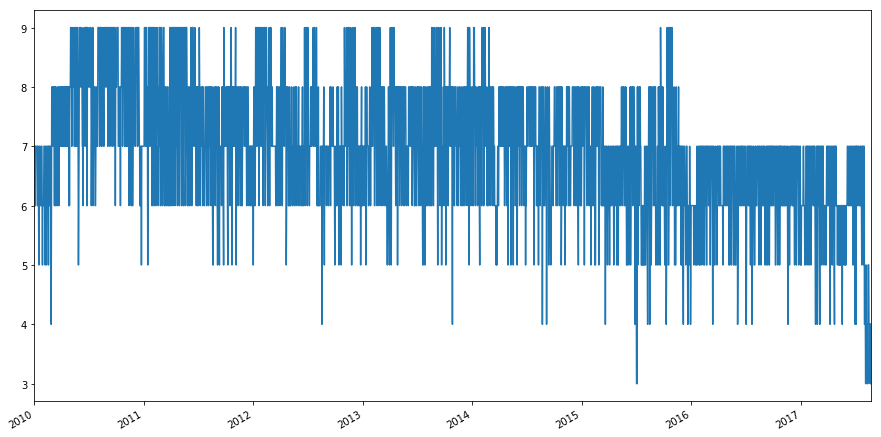

In [52]:
plt.figure(figsize=(15,8))
hawaii_measurements['date'].value_counts().plot()
plt.show();

In [56]:
# drop rows associated with null values in the prcp column
hawaii_measurements = hawaii_measurements.dropna()

In [57]:
display(hawaii_measurements.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18103 entries, 0 to 19549
Data columns (total 4 columns):
station    18103 non-null object
date       18103 non-null datetime64[ns]
prcp       18103 non-null float64
tobs       18103 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 707.1+ KB


None

In [60]:
# Save your cleaned dataframe to a csv file with the prefix clean_
hawaii_measurements.to_csv('Resources/clean_hawaii_measurements.csv')